In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
from sklearn.metrics import mean_squared_error
import gc
from pandas import tseries

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('Consumption.csv', parse_dates = ['Date'], index_col = 'Date',
                   date_parser = dateparse)
data.dtypes

Dotcom          int64
Mobile          int64
Connected TV    int64
dtype: object

In [3]:
data.head()

,Dotcom,Mobile,Connected TV
Date,,,
2014-07-31,4947163,4145770,1349345
2014-08-31,2008886,2653899,1177950
2014-09-30,4309852,4050363,1838526
2014-10-31,5506247,5597491,2404201
2014-11-30,5416268,5304073,2597079


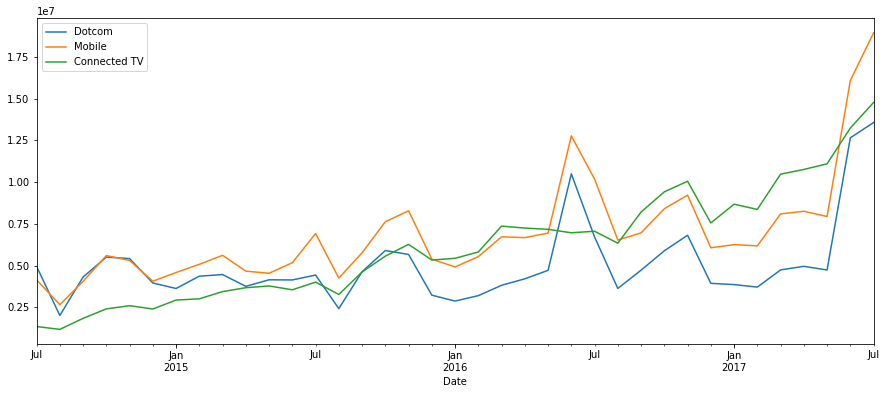

In [4]:
data.plot(figsize=(15, 6))
plt.show()

In [5]:
data2 = data.iloc[:,1]
data2.head()

Date
2014-07-31    4145770
2014-08-31    2653899
2014-09-30    4050363
2014-10-31    5597491
2014-11-30    5304073
Name: Mobile, dtype: int64

In [6]:
data2 = data2.astype(float)

In [7]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data2, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0,
                           seasonal=True, d=1, D=1, trace=True, error_action='ignore',  
                           suppress_warnings=True, stepwise=True)
print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pyramid.arima'

In [ ]:
p=0
q=0
d=0

for p in range(5):
    for d in range(5):
        for q in range(5):
            arima_mod=sm.tsa.ARIMA(data2,(p,d,q)).fit()